In [16]:
from fbprophet import Prophet
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load downloaded etf historic data
etfs_hist = context.catalog.load('etfs_historical')

2021-01-29 23:21:24,065 - kedro.io.data_catalog - INFO - Loading data from `etfs_historical` (PartitionedDataSet)...


In [81]:
# load FTSE100 ETF
filename = 'etf_INRG_IE00B1XNHC34'
isf = etfs_hist[filename]()

In [82]:
# prep etf data
isf = isf.rename(columns={'Close': 'y'})
isf['ds'] = isf['Date']
isf.index = pd.to_datetime(isf['Date'])

In [83]:
# prophet model
isf_model = Prophet()
isf_model.fit(isf)
isf_forecast = isf_model.make_future_dataframe(periods=90, freq='D')
isf_forecast = isf_model.predict(isf_forecast)
isf_forecast.set_index('ds', inplace=True)

2021-02-03 22:10:58,677 - fbprophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
def plot(df, df_forecast, symbol):
    plt.figure(figsize=(25, 10))
    plt.plot(df_forecast['yhat'], 'b-', label='yhat', linewidth=3)
    plt.plot(df.index, df['y'], 'g-', label='price', linewidth=1)
    plt.fill_between(df_forecast.index, 
                     df_forecast.yhat_lower, 
                     df_forecast.yhat_upper,
                     color='gray', alpha=0.2)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(symbol)
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\investing\\lib\\site-packages\\matplotlib\\pyplot.py'>

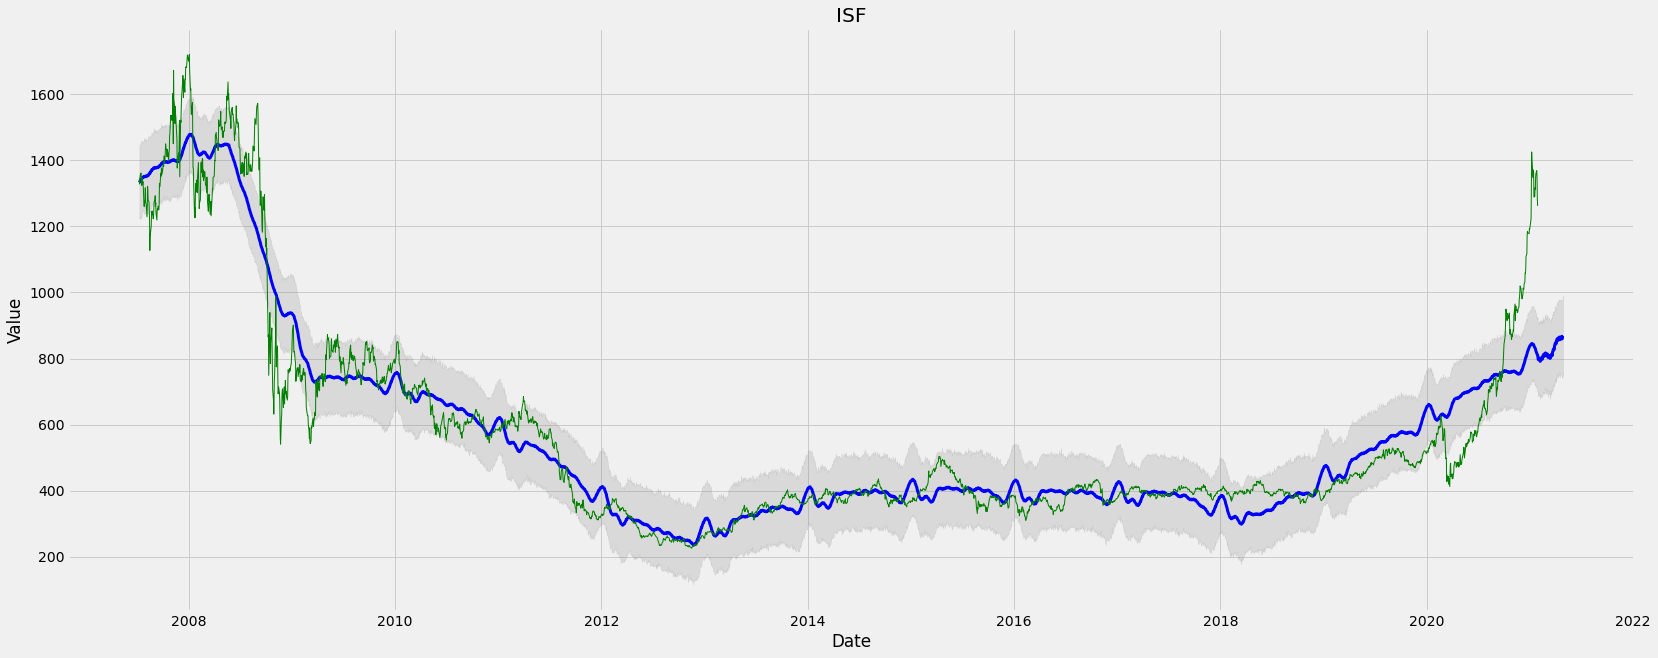

In [85]:
plot(isf, isf_forecast, 'ISF')